# Importing the required modules

In [1]:
#Import required modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Importing the Loan data and Inspection 

In [2]:
#Import and read the loan data. Store it in a variable called `loan`. Assuming csv file present in same folder.
loan = pd.read_csv('loan.csv')

## Inspect the dataframe

In [3]:
loan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
28173,542454,700021,5000,5000,5000.00000,36 months,7.88%,156.41,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
15530,741773,939761,8000,8000,7925.00000,36 months,7.49%,248.82,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
18353,698465,889911,3200,3200,3200.00000,60 months,16.40%,78.50,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
25981,574692,739303,20000,20000,19975.00000,36 months,15.58%,699.01,D,D3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19909,667062,852822,20000,20000,20000.00000,60 months,16.02%,486.58,D,D5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
25364,586093,752982,3000,3000,3000.00000,60 months,13.98%,69.78,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
37494,379642,406270,12000,12000,11925.00000,36 months,17.58%,431.31,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
17542,714006,907335,24175,24175,22733.30494,36 months,11.11%,792.72,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19901,666481,852088,15000,15000,14900.00000,36 months,10.00%,484.01,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1845,1045106,1275509,5000,5000,5000.00000,36 months,7.51%,155.56,A,A3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Check column-wise null percentages here
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Cleaning the data

In [5]:
# Removing all columns which has more than 90% values null
loan=loan.drop(loan.columns[loan.apply(lambda loan : round(100*(loan.isnull().sum()/len(loan.index)),2)>90)],axis=1)

In [6]:
# Check column-wise null percentages post columns remove
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

## We are removing 3 types of columns below,
    1. All columns whose values are either 0.0 or nan. Checked individual column.
    2. Columns which are less useful for analysis such URL (Listed below)
    3. Columns which are duplicate such as member_id

In [7]:
# Manually checking these columns, we found that 100%(all) values are either 0.0 or nan. So removing these coloumns
loan=loan.drop(['collections_12_mths_ex_med','tax_liens','delinq_amnt','acc_now_delinq','policy_code',
                'chargeoff_within_12_mths','initial_list_status','pymnt_plan','url','application_type','member_id',
                'zip_code','mths_since_last_delinq'],axis=1)

In [8]:
# Striping the months text from term column.
loan['term']=loan['term'].str.split(n=0,expand=True)[0]

#Striping the '%' sign from interrest rate column and converting data type to float
loan['int_rate']=loan['int_rate'].str.split('%',n=0,expand=True)[0]
loan['int_rate']=loan['int_rate'].astype('float64')

In [9]:
# Converting the 'issue date' in date+time data type
loan['issue_d']=pd.to_datetime(loan['issue_d'], format='%b-%y')
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')

In [10]:
loan.sample(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
15580,746390,20000,20000,20000.0,36,10.99,654.68,B,B3,NaN,...,17888.10,13725.83,3294.33,0.0,867.94,8.6794,2013-08-01,59.46,2014-01-01,0.0
20989,650128,7000,7000,7000.0,60,10.74,151.30,B,B4,Clark County School District,...,7124.97,7000.00,124.97,0.0,0.00,0.0000,2011-03-01,6974.36,2011-04-01,0.0
3471,1017556,15000,15000,15000.0,36,12.42,501.23,B,B4,Verio,...,18044.25,15000.01,3044.24,0.0,0.00,0.0000,2014-12-01,510.60,2016-04-01,0.0
13659,774927,7000,7000,7000.0,60,15.23,167.38,C,C5,Research Foundation Of Mental Hygeine- Columbi...,...,8505.46,7000.00,1505.46,0.0,0.00,0.0000,2013-01-01,5503.14,2013-02-01,0.0
4972,993953,17000,17000,16975.0,60,12.42,381.78,B,B4,Geotechnical Testing Services,...,15201.05,9212.65,4898.09,0.0,1112.68,197.5608,2014-12-01,381.78,2015-05-01,0.0


# Data Analysis
## Applicants loan status whether ‘defaulted’ or not. 

Text(0.5,1,'Applicants loan status whether ‘defaulted’ or not')

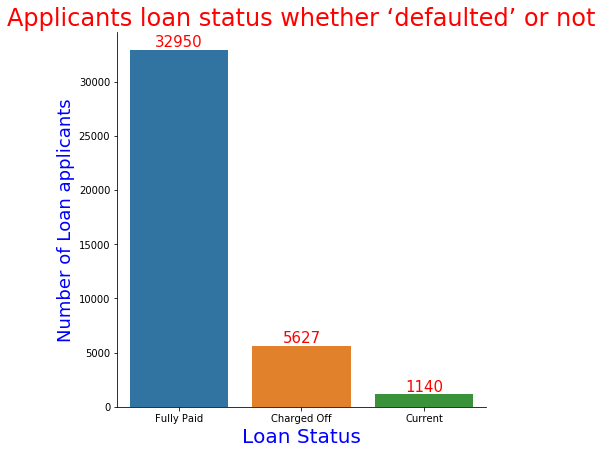

In [11]:
status_of_loan=loan['loan_status'].unique().tolist()

# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='loan_status', data=loan, kind="count", height=6, aspect=1, order=status_of_loan)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

g.set_xlabels('Loan Status',fontsize=20,color='blue').set_ylabels('Number of Loan applicants',fontsize=18,color='blue')
plt.title('Applicants loan status whether ‘defaulted’ or not',size=24,color='red') #Title to plot

# Univariate Analysis
## 1) Analysis of Debt to Loan ratio

In [12]:
loan['dti'].describe()

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

**We Can see that max Debt to income ratio in provided dataset is 30% which is good. Anything more than 36 Debt to income ratio is considered as risky to provide loan. This suggests wrt debt to income loan company is getting good borrowers.**
    1. https://www.investopedia.com/terms/d/dti.asp
    2. https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/
    
    This conclusion is based on couple of articles mentioned above.

Text(0.5,1,'Debt to Income')

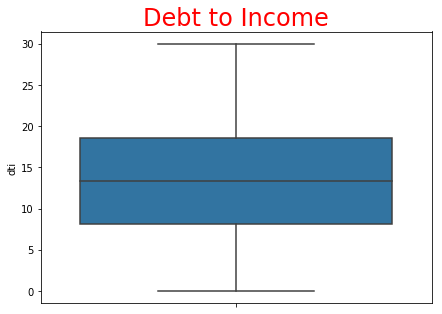

In [13]:
dims = (7, 5)
fig, ax = plt.subplots(figsize=dims)
ax = sns.boxplot(y="dti", data=loan)
plt.title('Debt to Income',size=24,color='red') #Title to plot

# Univariate Analysis
## 2) Analysis Of Loan Company Grades

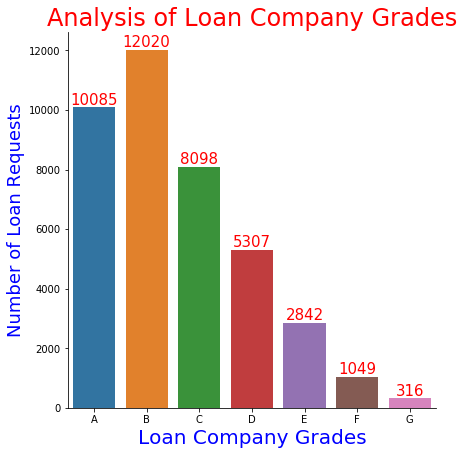

In [14]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='grade', data=loan, kind="count", height=6, aspect=1, order=['A','B','C','D','E','F','G'])
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Analysis of Loan Company Grades',size=24,color='red') #Title to plot
g.set_xlabels('Loan Company Grades',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

In [15]:
print("Grade A\t\t -->",len(loan.loc[loan['grade']=='A']),"\t -->", round(int(len(loan.loc[loan['grade']=='A']))/(len(loan.index))*100,2),"%")
print("Grade B\t\t -->",len(loan.loc[loan['grade']=='B']),"\t -->", round(int(len(loan.loc[loan['grade']=='B']))/(len(loan.index))*100,2),"%")
print("Grade C\t\t -->",len(loan.loc[loan['grade']=='C']),"\t -->", round(int(len(loan.loc[loan['grade']=='C']))/(len(loan.index))*100,2),"%")
print("Grade D\t\t -->",len(loan.loc[loan['grade']=='D']),"\t -->", round(int(len(loan.loc[loan['grade']=='D']))/(len(loan.index))*100,2),"%")
print("Grade E\t\t -->",len(loan.loc[loan['grade']=='E']),"\t -->", round(int(len(loan.loc[loan['grade']=='E']))/(len(loan.index))*100,2),"%")
print("Grade F\t\t -->",len(loan.loc[loan['grade']=='F']),"\t -->", round(int(len(loan.loc[loan['grade']=='F']))/(len(loan.index))*100,2),"%")
print("Grade G\t\t -->",len(loan.loc[loan['grade']=='G']),"\t -->", round(int(len(loan.loc[loan['grade']=='G']))/(len(loan.index))*100,2),"%")

Grade A		 --> 10085 	 --> 25.39 %
Grade B		 --> 12020 	 --> 30.26 %
Grade C		 --> 8098 	 --> 20.39 %
Grade D		 --> 5307 	 --> 13.36 %
Grade E		 --> 2842 	 --> 7.16 %
Grade F		 --> 1049 	 --> 2.64 %
Grade G		 --> 316 	 --> 0.8 %


#### Observations - Loan Company Grade
    - This means 76% loan applications are graded in Category A, B, C
    - Grade B is having the highest number of loans, followed by Grade A, and the number decreases continuously from grade C
      all the way to grade F.

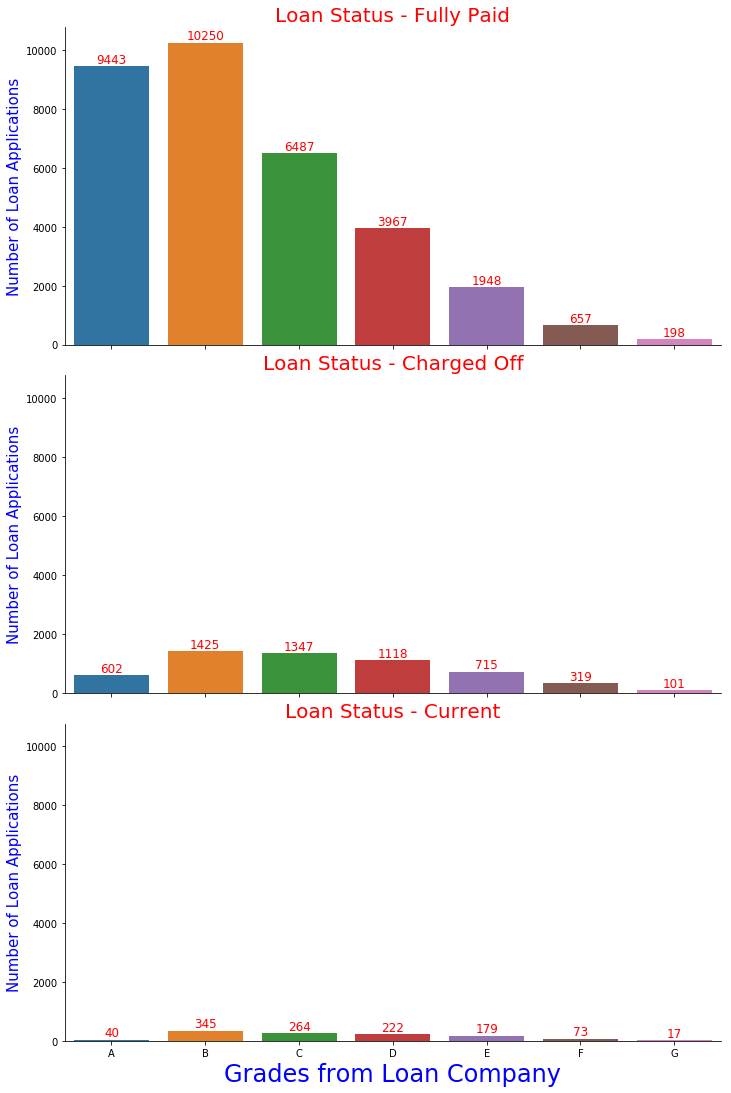

In [16]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
ax=sns.catplot(x='grade',row='loan_status',data=loan, kind="count", order=['A','B','C','D','E','F','G'], height=5, aspect=2,legend=False)
ax.set_titles("Loan Status - {row_name}",size=20,color='red').set_xlabels('Grades from Loan Company',fontsize=24,color='blue').set_ylabels('Number of Loan Applications',fontsize=15,color='blue')

for ax in ax.axes.flat: ##Getting each facetgrid object to iterate. Here facetgrid object is each row in below plot.
    for p in ax.patches:    ## Adding lable to each facetgrid object and each patch of above column. Each column is patch.
        ax.text(p.get_x() + p.get_width()/2., # x co-ordinate
                p.get_height(), # y co-ordinate
                '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text need it in str
                fontsize=12, 
                color='red', 
                ha='center', 
                va='bottom')

In [17]:
# Creating new datafram where loan status is charged off
loan_charged_off=loan.loc[(loan['loan_status']=='Charged Off')]

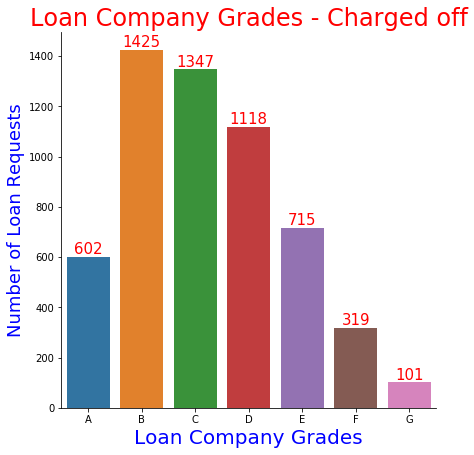

In [18]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='grade', data=loan_charged_off, kind="count", height=6, aspect=1, order=['A','B','C','D','E','F','G'])
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Loan Company Grades - Charged off',size=24,color='red') #Title to plot
g.set_xlabels('Loan Company Grades',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

In [19]:
print("Grade A\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='A']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='A']))/(len(loan_charged_off.index))*100,2),"%")
print("Grade B\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='B']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='B']))/(len(loan_charged_off.index))*100,2),"%")
print("Grade C\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='C']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='C']))/(len(loan_charged_off.index))*100,2),"%")
print("Grade D\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='D']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='D']))/(len(loan_charged_off.index))*100,2),"%")
print("Grade E\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='E']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='E']))/(len(loan_charged_off.index))*100,2),"%")
print("Grade F\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='F']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='F']))/(len(loan_charged_off.index))*100,2),"%")
print("Grade G\t\t -->",len(loan_charged_off.loc[loan_charged_off['grade']=='G']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['grade']=='G']))/(len(loan_charged_off.index))*100,2),"%")

Grade A		 --> 602 	 --> 10.7 %
Grade B		 --> 1425 	 --> 25.32 %
Grade C		 --> 1347 	 --> 23.94 %
Grade D		 --> 1118 	 --> 19.87 %
Grade E		 --> 715 	 --> 12.71 %
Grade F		 --> 319 	 --> 5.67 %
Grade G		 --> 101 	 --> 1.79 %


- #### Observations - LC Grade
    - 60% loan applications are graded in Category A, B, C defaulting the loan.
    - Loan Company need to check their Grading system because 60% defaulters categorized as good borrowers.

# Univariate Analysis
## 3) Analysis of Loan Purpose

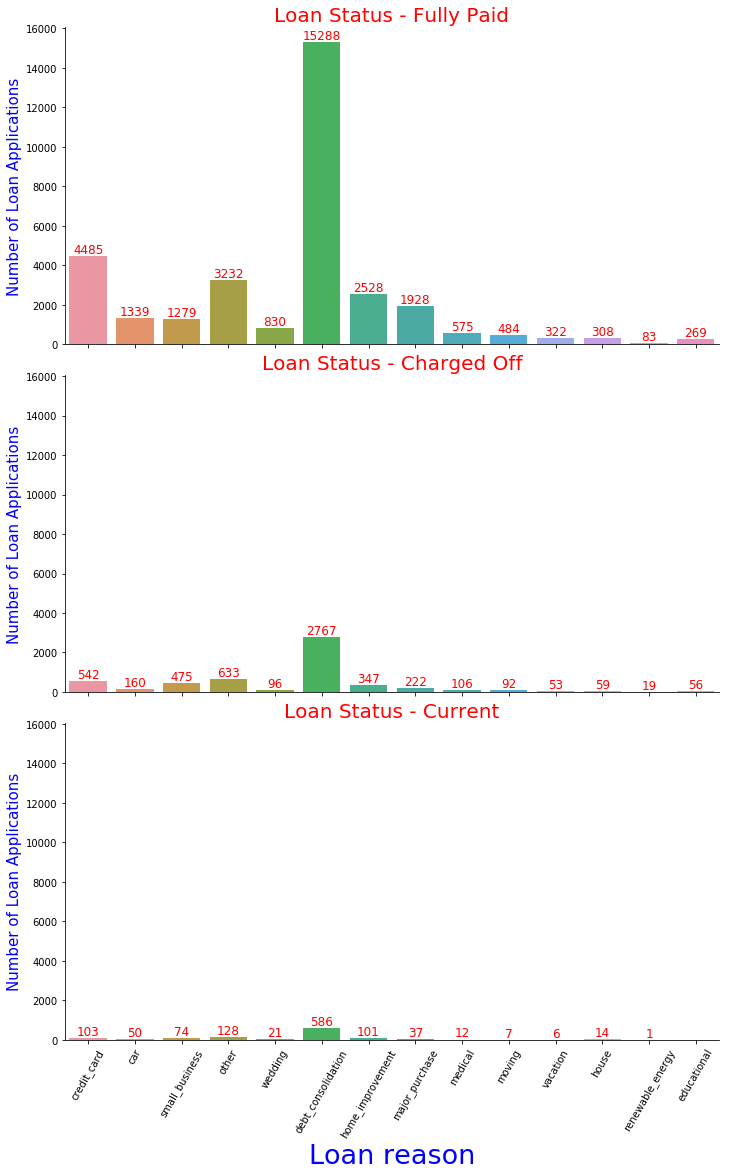

In [20]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
ax=sns.catplot(x='purpose',row='loan_status',data=loan, kind="count", height=5, aspect=2,legend=False)
ax.set_titles("Loan Status - {row_name}",size=20,color='red').set_xlabels('Loan reason',fontsize=27,color='blue').set_ylabels('Number of Loan Applications',fontsize=15,color='blue')
plt.xticks(rotation=60)

for ax in ax.axes.flat: ##Getting each facetgrid object to iterate. Here facetgrid object is each row in below plot.
    for p in ax.patches:    ## Adding lable to each facetgrid object and each patch of above column. Each column is patch.
        if np.isnan(p.get_height()):
            0
        else:
            ax.text(p.get_x() + p.get_width()/2., # x co-ordinate
                p.get_height(), # y co-ordinate
                '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text need it in str
                fontsize=12, 
                color='red', 
                ha='center', 
                va='bottom')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

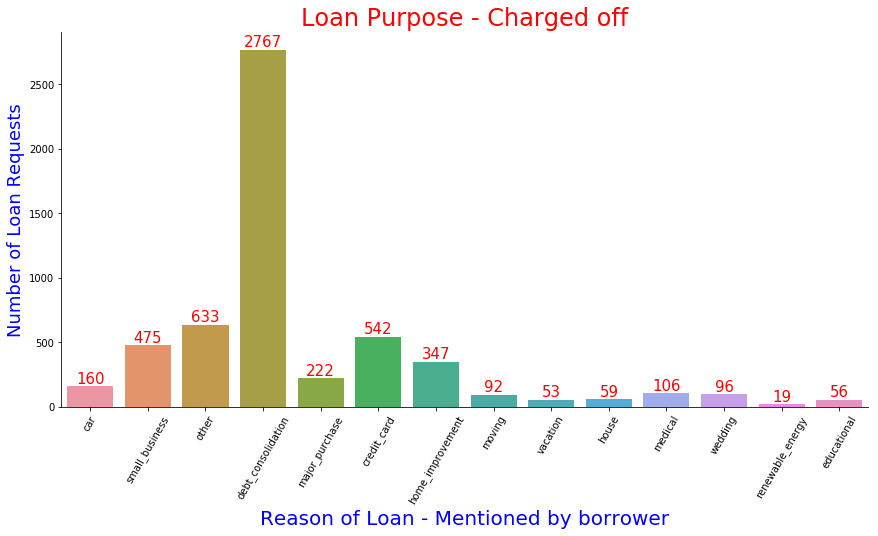

In [21]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='purpose', data=loan_charged_off, kind="count", height=6, aspect=2)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Loan Purpose - Charged off',size=24,color='red') #Title to plot
g.set_xlabels('Reason of Loan - Mentioned by borrower',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')
plt.xticks(rotation=60)

In [22]:
print("Car\t\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='car']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='car']))/(len(loan_charged_off.index))*100,2),"%")
print("small_business\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='small_business']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='small_business']))/(len(loan_charged_off.index))*100,2),"%")
print("debt_consolidation\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='debt_consolidation']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='debt_consolidation']))/(len(loan_charged_off.index))*100,2),"%")
print("major_purchase\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='major_purchase']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='major_purchase']))/(len(loan_charged_off.index))*100,2),"%")
print("credit_card\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='credit_card']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='credit_card']))/(len(loan_charged_off.index))*100,2),"%")
print("home_improvement\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='home_improvement']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='home_improvement']))/(len(loan_charged_off.index))*100,2),"%")
print("moving\t\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='moving']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='moving']))/(len(loan_charged_off.index))*100,2),"%")
print("vacation\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='vacation']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='vacation']))/(len(loan_charged_off.index))*100,2),"%")
print("house\t\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='house']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='house']))/(len(loan_charged_off.index))*100,2),"%")
print("medical\t\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='medical']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='medical']))/(len(loan_charged_off.index))*100,2),"%")
print("wedding\t\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='wedding']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='wedding']))/(len(loan_charged_off.index))*100,2),"%")
print("renewable_energy\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='renewable_energy']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='renewable_energy']))/(len(loan_charged_off.index))*100,2),"%")
print("educational\t\t -->",len(loan_charged_off.loc[loan_charged_off['purpose']=='educational']),"\t -->", round(int(len(loan_charged_off.loc[loan_charged_off['purpose']=='educational']))/(len(loan_charged_off.index))*100,2),"%")

Car			 --> 160 	 --> 2.84 %
small_business		 --> 475 	 --> 8.44 %
debt_consolidation	 --> 2767 	 --> 49.17 %
major_purchase		 --> 222 	 --> 3.95 %
credit_card		 --> 542 	 --> 9.63 %
home_improvement	 --> 347 	 --> 6.17 %
moving			 --> 92 	 --> 1.63 %
vacation		 --> 53 	 --> 0.94 %
house			 --> 59 	 --> 1.05 %
medical			 --> 106 	 --> 1.88 %
wedding			 --> 96 	 --> 1.71 %
renewable_energy	 --> 19 	 --> 0.34 %
educational		 --> 56 	 --> 1.0 %


- #### Observations - Purpose of Loan
    - Debt_Consolidation - 49.17%
    - Credit Card - 9.63% 
    - Small Business - 8.44%
    - Home Improvement - 6.17%

# Univariate Analysis
## 4) Statewise borrowers history who defaulted

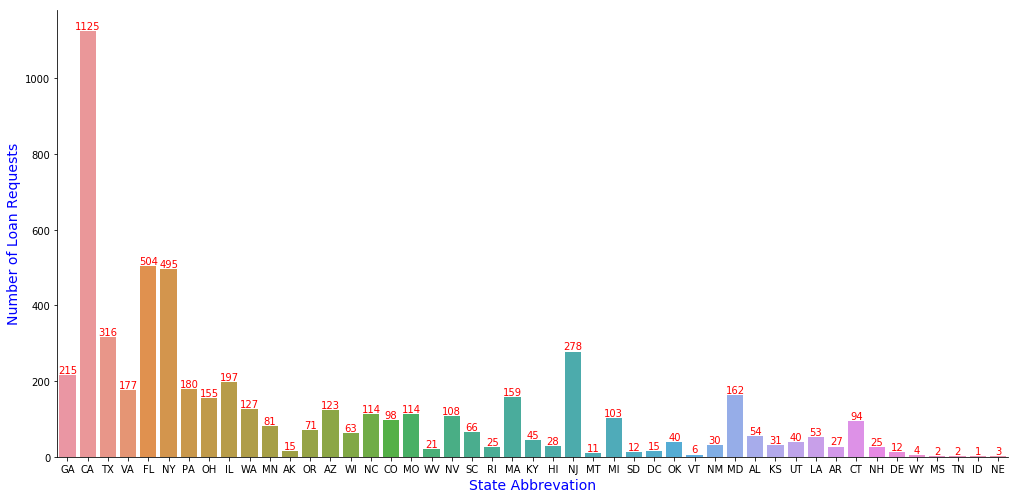

In [23]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='addr_state', kind='count', data=loan_charged_off,height=7, aspect=2)
g.set_xlabels('State Abbrevation',size=14,color='blue').set_ylabels('Number of Loan Requests',size=14,color='blue')

for ax in g.axes.flat: ##Getting each facetgrid object to iterate. Here facetgrid object is each row in below plot.
    for p in ax.patches:    ## Adding lable to each facetgrid object and each patch of above column. Each column is patch.
        ax.text(p.get_x() + p.get_width()/2., # x co-ordinate
                p.get_height(), # y co-ordinate
                '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text need it in str
                fontsize=10, 
                color='red', 
                ha='center', 
                va='bottom')

- Observation - California, Florida, New York, Texas, New Jersey are top states where loan default rate is high

# Univariate Analysis
## 5) Loan Company Borrowers Verification Status

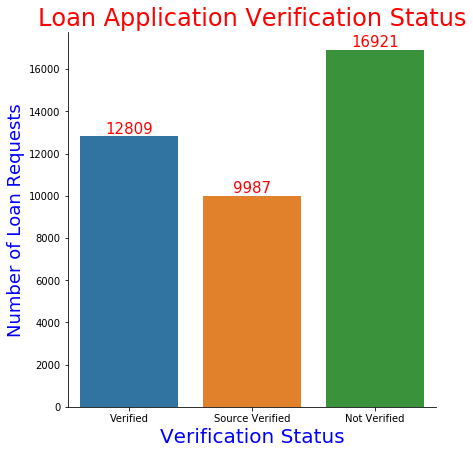

In [24]:
loan_verification_stat= loan['verification_status'].unique()
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='verification_status', data=loan, kind="count", height=6, aspect=1, order=loan_verification_stat)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Loan Application Verification Status',size=24,color='red') #Title to plot
g.set_xlabels('Verification Status',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

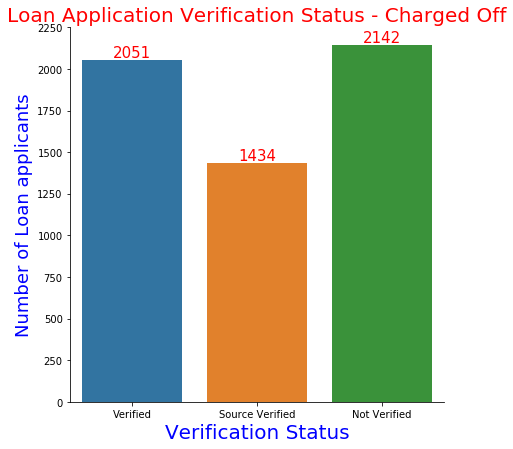

In [25]:
loan_verification_stat= loan['verification_status'].unique()
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='verification_status', data=loan_charged_off, kind="count", height=6, aspect=1, order=loan_verification_stat)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Loan Application Verification Status - Charged Off',size=20,color='red') #Title to plot
g.set_xlabels('Verification Status',fontsize=20,color='blue').set_ylabels('Number of Loan applicants',fontsize=18,color='blue')

In [26]:
cnt_verified=len(loan_charged_off.loc[(loan_charged_off['verification_status']=='Verified')])
cnt_source_verified=len(loan_charged_off.loc[(loan_charged_off['verification_status']=='Source Verified')])
cnt_not_verified=len(loan_charged_off.loc[(loan_charged_off['verification_status']=='Not Verified')])

print("Applicant Verified \t\t -->",cnt_verified,"\t -->", round((int(cnt_verified)/(len(loan_charged_off.index)))*100,2),"%")
print("Applicant Source Verified\t -->",cnt_source_verified,"\t -->", round((int(cnt_source_verified)/(len(loan_charged_off.index)))*100,2),"%")
print("Applicant Not Verified \t\t -->",cnt_not_verified,"\t -->", round((int(cnt_not_verified)/(len(loan_charged_off.index)))*100,2),"%")

Applicant Verified 		 --> 2051 	 --> 36.45 %
Applicant Source Verified	 --> 1434 	 --> 25.48 %
Applicant Not Verified 		 --> 2142 	 --> 38.07 %


### This clearly shows Source verified Applications are less defaulted.
    - Loan Company need to increase source verification which is only 25.48%
    - Loan Company can do additional verification. Means Not Verified and Verified contributes to 74.52% which is very high.

# Univariate Analysis
## 6) Number of Open Accounts of applicants who defaulted the loan

Text(0.5,1,'Number of Open Accounts which defaulted ')

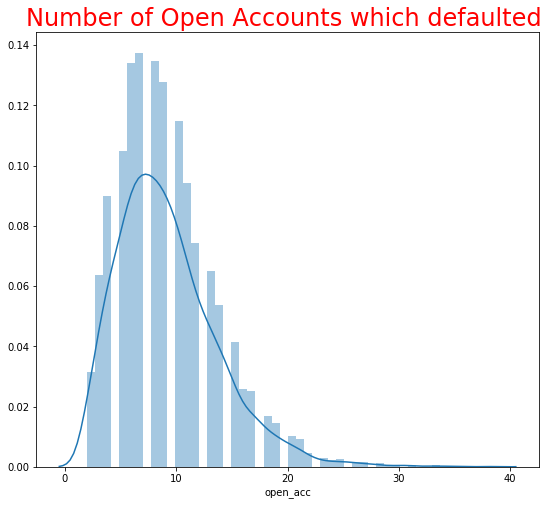

In [27]:
# Using Seaborn Distribution plot seaborn.distplot(). Using Histogram
a4_dims = (9, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.distplot(loan_charged_off['open_acc'], hist=True, kde=True)
plt.title('Number of Open Accounts which defaulted ',size=24,color='red') #Title to plot

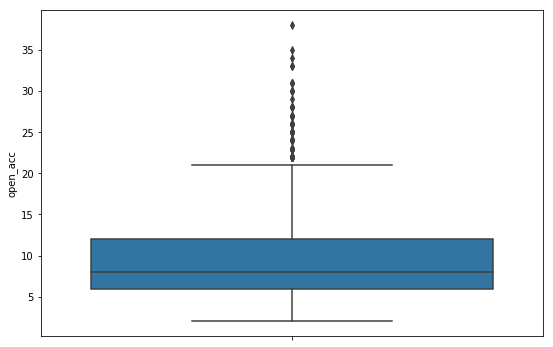

In [28]:
#Try to add it in univariate
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(y="open_acc", data=loan_charged_off)

### Total number of Open Account shows presense of outliers who defaulted the loan.

# Univariate Analysis
## 7) Funded and Loan amount

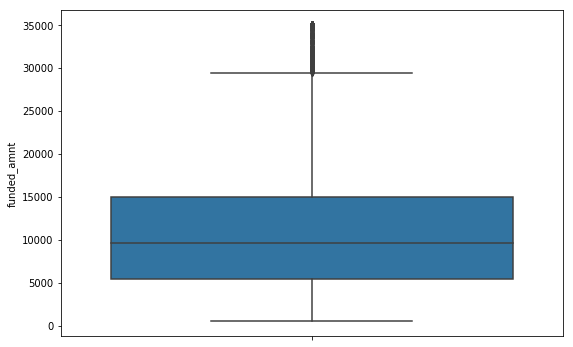

In [29]:
#Try to add it in univariate
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(y="funded_amnt", data=loan)

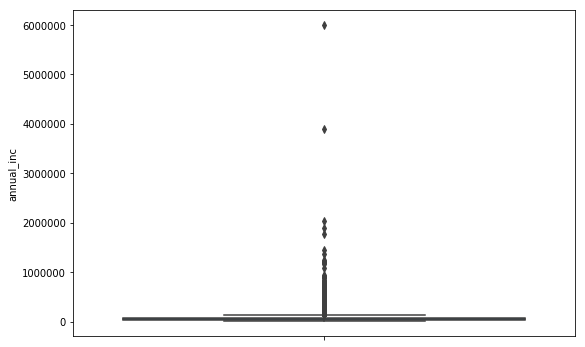

In [30]:
#Try to add it in univariate
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.boxplot(y="annual_inc", data=loan)

### Funded and Loan amount shows presense of outliers.

# Bi-Variate Analysis
## 1) Loan Term and Years of employment

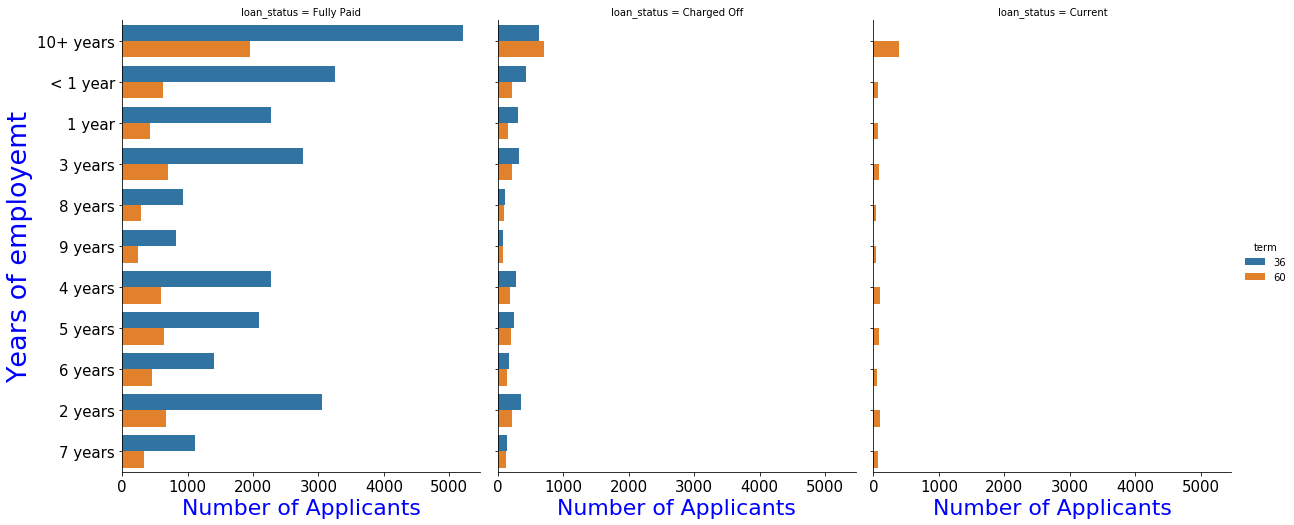

In [31]:
# Checking the ride request per slots for different available days
g=sns.catplot(y='emp_length',col='loan_status', hue='term',data=loan, kind="count", height=7, aspect=0.8)
g.set_xlabels('Number of Applicants',size=22,color='blue').set_ylabels('Years of employemt',size=27,color='blue')
g.set_xticklabels(fontsize=15).set_yticklabels(fontsize=15)

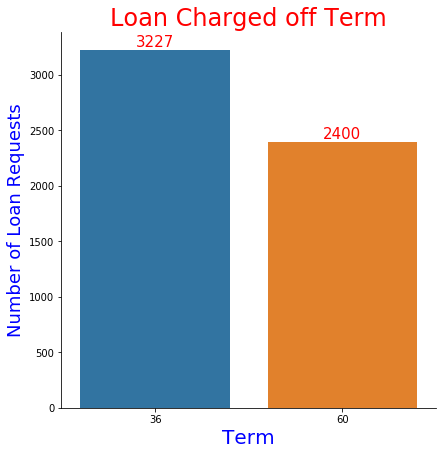

In [32]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='term', data=loan_charged_off, kind="count", height=6, aspect=1)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Loan Charged off Term',size=24,color='red') #Title to plot
g.set_xlabels('Term',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

Text(0.5,1,'Loan Term vs Years of experience ')

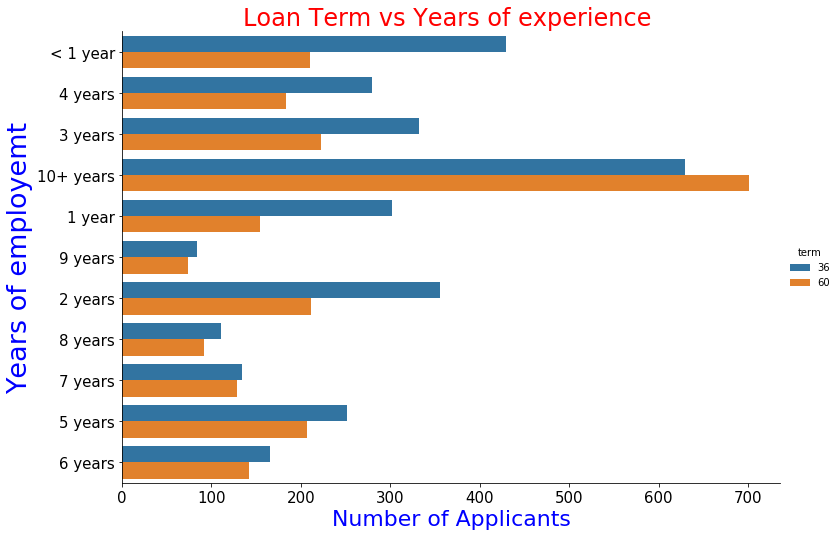

In [33]:
# Checking the ride request per slots for different available days
g=sns.catplot(y='emp_length',col='loan_status', hue='term',data=loan_charged_off,kind="count", height=7, aspect=1.5)
g.set_xlabels('Number of Applicants',size=22,color='blue').set_ylabels('Years of employemt',size=27,color='blue')
g.set_xticklabels(fontsize=15).set_yticklabels(fontsize=15)
plt.title('Loan Term vs Years of experience ',size=24,color='red') #Title to plot

In [34]:
cnt_36_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='< 1 year') & (loan_charged_off['term']=='36')])
cnt_60_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='< 1 year') & (loan_charged_off['term']=='60')])
print("< 1 year & Term 36 Months\t -->",cnt_36_10yrs,"\t -->", round((int(cnt_36_10yrs)/(len(loan_charged_off.index)))*100,2),"%")
print("< 1 year & Term 60 Months\t -->",cnt_60_10yrs,"\t -->", round((int(cnt_60_10yrs)/(len(loan_charged_off.index)))*100,2),"%")

< 1 year & Term 36 Months	 --> 429 	 --> 7.62 %
< 1 year & Term 60 Months	 --> 210 	 --> 3.73 %


In [35]:
cnt_36_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='1 year') & (loan_charged_off['term']=='36')])
cnt_60_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='1 year') & (loan_charged_off['term']=='60')])
print("1 year & Term 36 Months\t -->",cnt_36_10yrs,"\t -->", round((int(cnt_36_10yrs)/(len(loan_charged_off.index)))*100,2),"%")
print("1 year & Term 60 Months\t -->",cnt_60_10yrs,"\t -->", round((int(cnt_60_10yrs)/(len(loan_charged_off.index)))*100,2),"%")

1 year & Term 36 Months	 --> 302 	 --> 5.37 %
1 year & Term 60 Months	 --> 154 	 --> 2.74 %


In [36]:
cnt_36_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='2 years') & (loan_charged_off['term']=='36')])
cnt_60_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='2 years') & (loan_charged_off['term']=='60')])
print("2 year & Term 36 Months\t -->",cnt_36_10yrs,"\t -->", round((int(cnt_36_10yrs)/(len(loan_charged_off.index)))*100,2),"%")
print("2 year & Term 60 Months\t -->",cnt_60_10yrs,"\t -->", round((int(cnt_60_10yrs)/(len(loan_charged_off.index)))*100,2),"%")

2 year & Term 36 Months	 --> 356 	 --> 6.33 %
2 year & Term 60 Months	 --> 211 	 --> 3.75 %


In [37]:
cnt_36_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='3 years') & (loan_charged_off['term']=='36')])
cnt_60_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='3 years') & (loan_charged_off['term']=='60')])
print("3 year & Term 36 Months\t -->",cnt_36_10yrs,"\t -->", round((int(cnt_36_10yrs)/(len(loan_charged_off.index)))*100,2),"%")
print("3 year & Term 60 Months\t -->",cnt_60_10yrs,"\t -->", round((int(cnt_60_10yrs)/(len(loan_charged_off.index)))*100,2),"%")

3 year & Term 36 Months	 --> 332 	 --> 5.9 %
3 year & Term 60 Months	 --> 223 	 --> 3.96 %


In [38]:
cnt_36_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='4 years') & (loan_charged_off['term']=='36')])
cnt_60_10yrs=len(loan_charged_off.loc[(loan_charged_off['emp_length']=='4 years') & (loan_charged_off['term']=='60')])
print("4 year & Term 36 Months\t -->",cnt_36_10yrs,"\t -->", round((int(cnt_36_10yrs)/(len(loan_charged_off.index)))*100,2),"%")
print("4 year & Term 60 Months\t -->",cnt_60_10yrs,"\t -->", round((int(cnt_60_10yrs)/(len(loan_charged_off.index)))*100,2),"%")

4 year & Term 36 Months	 --> 279 	 --> 4.96 %
4 year & Term 60 Months	 --> 183 	 --> 3.25 %


 - #### Observations - Number of years of employment versus Loan Term
 Year of experience & Term in Months --> 36 Months	 --> 60 Months
                - <1 year	 --> 5.37 % 	 --> 2.74 %
                - 2 year	 --> 6.33 % 	 --> 3.75 %
                - 3 year	 --> 5.90 % 	 --> 3.96 %
                - 4 year	 --> 4.96 % 	 --> 3.25 %
### This clearly shows lesser the number of years of experience we need to provide higher loan term.

# Bi-Variate Analysis
##  2) Analysis of Home Ownership

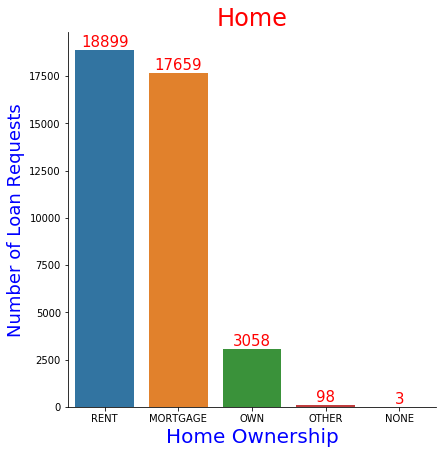

In [39]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='home_ownership', data=loan, kind="count", height=6, aspect=1, order=['RENT','MORTGAGE','OWN','OTHER','NONE'])
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Home',size=24,color='red') #Title to plot
g.set_xlabels('Home Ownership',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

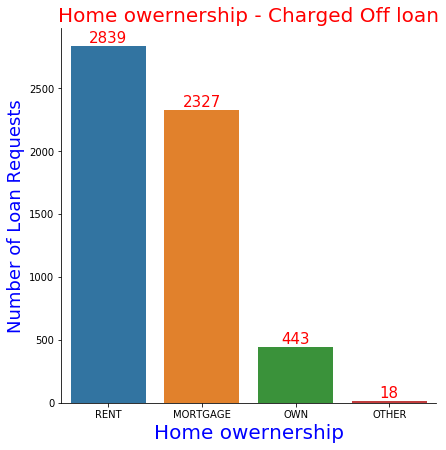

In [40]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='home_ownership', data=loan_charged_off, kind="count",  order=['RENT','MORTGAGE','OWN','OTHER'], height=6, aspect=1)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Home owernership - Charged Off loan',size=20,color='red') #Title to plot
g.set_xlabels('Home owernership',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

### Home Ownership - Charged Off Loan.
    - Nearly 92% of the applicants who defaulted the loan do not own their home.
    - Majority of the borrowers are either living in Mortgaged or Rented houses.
    - Majority of the loan applications are for 36 months tenure.

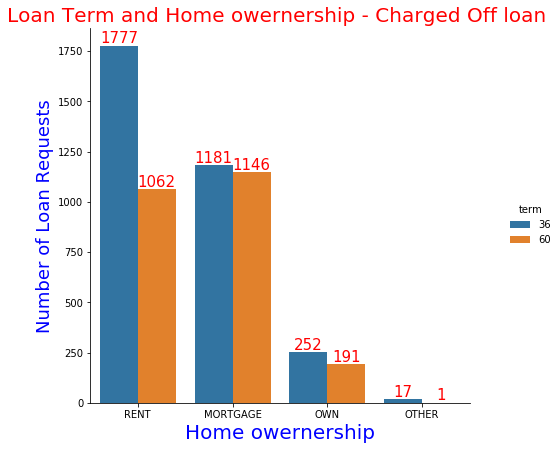

In [41]:
# Using Seaborn Categorical plot seaborn.catplot(). Using kind parameter to count.
g=sns.catplot(x='home_ownership', data=loan_charged_off, kind="count", hue='term',  order=['RENT','MORTGAGE','OWN','OTHER'], height=6, aspect=1)
ax=plt.gca() # Getting the current active axes to decorates the plot with labels, etc.

#Add data lable on top of every column
for p in ax.patches:                      # Each column is patch. To add lebale we need to iterate.
    ax.text(p.get_x() + p.get_width()/2., # x co-ordinate of ax_text method
            p.get_height(),               # y co-ordinate of ax_text method
            '%d' % (int(p.get_height())), # Value of height of column converting to str (%d) because ax.text() need it in str
            fontsize=15, 
            color='red', 
            ha='center', 
            va='bottom')

plt.title('Loan Term and Home owernership - Charged Off loan ',size=20,color='red') #Title to plot
g.set_xlabels('Home owernership',fontsize=20,color='blue').set_ylabels('Number of Loan Requests',fontsize=18,color='blue')

In [42]:
cnt_36_rent=len(loan_charged_off.loc[(loan_charged_off['home_ownership']=='RENT') & (loan_charged_off['term']=='36')])
cnt_60_rent=len(loan_charged_off.loc[(loan_charged_off['home_ownership']=='RENT') & (loan_charged_off['term']=='60')])
print("Rented home & term 36 Months\t -->",cnt_36_rent,"\t -->", round((int(cnt_36_rent)/(len(loan_charged_off.index)))*100,2),"%")
print("Rented home  & term 60 Months\t -->",cnt_60_rent,"\t -->", round((int(cnt_60_rent)/(len(loan_charged_off.index)))*100,2),"%")

Rented home & term 36 Months	 --> 1777 	 --> 31.58 %
Rented home  & term 60 Months	 --> 1062 	 --> 18.87 %


 - #### Observations - Number of years of employment versus Loan Term
 - If borrower is staying in rented home & term of loan is 36 Months, chances of default is 31.58 %
 - If borrower is staying in rented home & team of loan is 60 Months, chances of default  is 18.87 %         
#### This clearly shows that if borrower is staying in rented home, provide him higher loan term to avoid defaulting. 

# Bi-Variate Analysis
## 3) Analysis of Loan and Funded amount

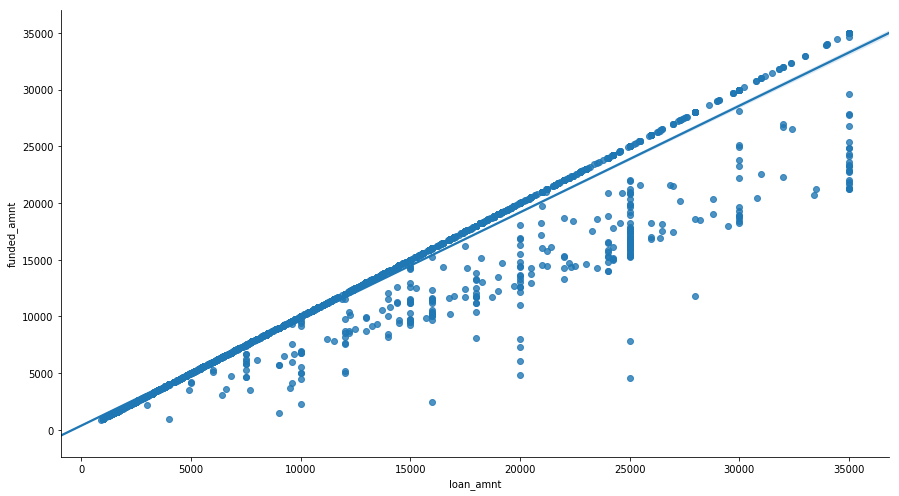

In [43]:
# Using Seaborn lmplot plot seaborn.lmplot().
sns.lmplot(x="loan_amnt", y="funded_amnt", data=loan_charged_off, height=7, aspect=1.8)

### There is high correlation between funded_amt & loan_amt. 